Code in this notebook uses the TF/KEras pre-trained model VGG16.

Last time this code was used was in late 2023, with Keras 3.02 or 3.05

Go slowly to determine if code is still OK with this model

I tested this code under TF 2.18 on 2/13/2025



**Instantiating the VGG16 convolutional base**

Enter here comments and info about the VGG16 Model



In [1]:
# get the libraries ready
import os
from icecream import ic

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# import keras
from keras.utils import load_img, img_to_array
from keras.utils import array_to_img

from keras import layers

import numpy as np
import random

import os, shutil, pathlib

2025-02-22 03:39:05.186167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740195545.200408       9 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740195545.204369       9 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-22 03:39:05.220009: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:


codeDir = "/drv3/hm3/code/python/tf/keras/Playground/"
origTrDir = "/drv3/hm3/Data/imgData/CatsDogs_Kaggle/"
original_dir = pathlib.Path("/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/")
new_base_dir = pathlib.Path("/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/SmallSet/")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# make_subset("train", start_index=0, end_index=1000)
#make_subset("validation", start_index=1000, end_index=1500)
#make_subset("test", start_index=1500, end_index=2500)

In [2]:
# conv_base is the convolution base of the VGG16 model.

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

I0000 00:00:1740195554.366117       9 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9309 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
#  Do not use this cell to get the data 
# from keras.utils import image_dataset_from_directory

# train_dataset = image_dataset_from_directory(
#     new_base_dir / "train",
#     image_size=(180, 180),
#     batch_size=32)

# validation_dataset = image_dataset_from_directory(
#     new_base_dir / "validation",
#     image_size=(180, 180),
#     batch_size=32)

# test_dataset = image_dataset_from_directory(
#     new_base_dir / "test",
#     image_size=(180, 180),
#     batch_size=32)

# --------------------------------
new_base_dir = "./CatsDogs_Kaggle/fullset/"
image_height = 180  # Adjust as needed
image_width = 180  # Adjust as needed
batch_size = 32      # Adjust as needed
# epochs = 20         # Adjust as needed


# 2. Data Loading and Preprocessing using image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    # data_dir,  # Path to training data
    new_base_dir + "/training",  # Path to training data
    labels='inferred',     # Infer labels from directory structure
    label_mode='binary',   # Use binary labels (0 for cat, 1 for dog)
    image_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=True,          # Shuffle the training data
    validation_split=0.2,  # Create a validation set (optional)
    subset="training",      # Specify this is the training set
    seed=123               # For reproducibility (optional)
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    # data_dir,  # Same directory as training, but different subset
    new_base_dir + "/training",  # Same directory as training, but different subset
    labels='inferred',
    label_mode='binary',
    image_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=False,         # No need to shuffle validation data
    validation_split=0.2,
    subset="validation",
    seed=123
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    new_base_dir + "/test",  # Path to test data
    labels='inferred',
    label_mode='binary',
    image_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=False        # No need to shuffle test data
)


Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 8005 files belonging to 2 classes.
Using 1601 files for validation.
Found 2023 files belonging to 2 classes.


#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [ ]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [8]:
print(train_features.shape)
print(val_features.shape)
print(test_features.shape)


(6404, 5, 5, 512)
(1601, 5, 5, 512)
(2023, 5, 5, 512)


**Defining and training the densely connected classifier**

In [ ]:
# code in this cell took 7.9 secs to execute

inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="./CatsDogs_Kaggle/KerasModel/VGG16.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels, verbose=0,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

#15seg

2025-02-22 03:42:06.830102: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_624', 32 bytes spill stores, 32 bytes spill loads

2025-02-22 03:42:06.841671: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_624', 24 bytes spill stores, 24 bytes spill loads

2025-02-22 03:42:06.846375: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_624', 32 bytes spill stores, 32 bytes spill loads



In [ ]:
# TEST ACCURACY WAS 0.975

test_model = keras.models.load_model("./CatsDogs_Kaggle/KerasModel/VGG16.keras")
test_loss, test_acc = test_model.evaluate(test_features,test_labels)
print(f"Test loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

# Test loss: 9.102
# Test accuracy: 0.971

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9631 - loss: 16.7816
Test loss: 9.102
Test accuracy: 0.971


**Plotting the results**

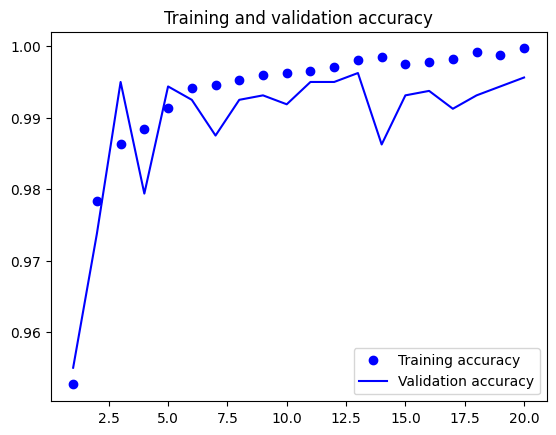

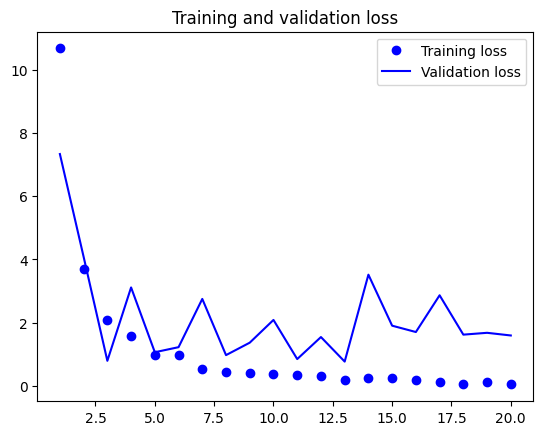

In [10]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [16]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [17]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [18]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [19]:

# second model with Data Aurmentation 
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
# code in this cell takes 6 minutes to execute

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./CatsDogs_Kaggle/KerasModel/VGG16_DA.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset, verbose=0,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)


#16min

**Evaluating the model on the test set**

In [ ]:
# TEST ACCURACY WAS 0.975

test_model = keras.models.load_model(
    "./CatsDogs_Kaggle/KerasModel/VGG16_DA.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

# Test loss: 1.519
# Test accuracy: 0.979

64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9682 - loss: 2.8302
Test loss: 1.519
Test accuracy: 0.979


### Fine-tuning a pretrained model

In [22]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

**Freezing all layers until the fourth from the last**

In [23]:

# this model freezes the params (trainable == False)
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
# code in this cell takes 3m 36 secs to execute 
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./CatsDogs_Kaggle/KerasModel/VGG16_FineTunning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset, verbose=0,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

#10min17s

In [ ]:
# code runs in 6 secs, reporting accuracy of 0.978

model = keras.models.load_model("./CatsDogs_Kaggle/KerasModel/VGG16_FineTunning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

# accuracy = 0.978
# Test loss: 1.377
# Test accuracy: 0.979

64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9695 - loss: 2.6584
Test loss: 1.377
Test accuracy: 0.979


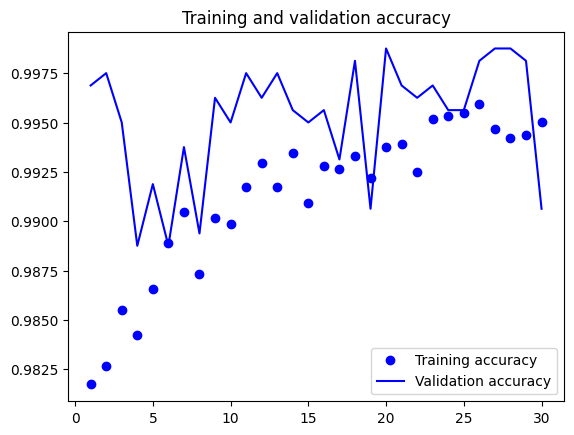

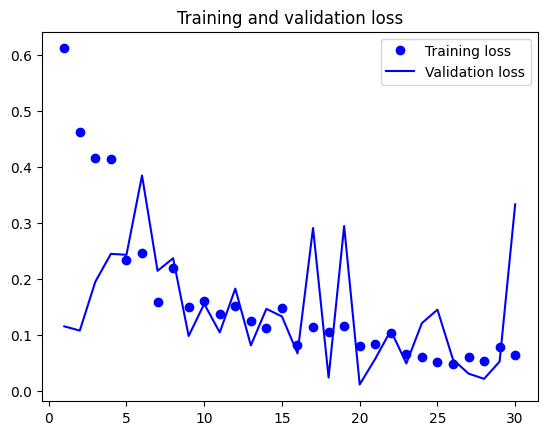

In [26]:
# plotting the results after fine-tunning the model
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

 Summary